In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from matplotlib import gridspec
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import ListedColormap
import matplotlib as mpl
from cartopy.util import add_cyclic_point
import cmaps

d:\anaconda\envs\ES\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
def AreaWeightMean(data2D, lat, lon):
    '''
    data2D: 要进行区域加权平均的变量  2D: [lat, lon]
    lat: data2D对应的纬度 1D 最好不要包括-90° 和 90°  因为NCL 和 Python 计算 np.cos(90 * rad) 值差的很大 
    lon: data2D对应的经度 1D
    '''
    jlat = lat.shape[0]
    rad = 4.0 * np.arctan(1.0) / 180.0
    re = 6371220.0
    rr = re * rad
    dlon = np.abs(lon[2] - lon[1]) * rr
    dx = dlon * np.cos(lat * rad)
    dy = np.zeros(jlat)
    dy[0] = np.abs(lat[2] - lat[1]) * rr
    dy[1: jlat - 1]  = np.abs(lat[2: jlat]-lat[0: jlat - 2])*rr * 0.5
    dy[jlat - 1] = abs(lat[jlat - 1] - lat[jlat - 2]) * rr
    area = dx * dy
    # dataAreaWeightMean = np.sum(np.dot(area, data2D))/np.sum(area)
    sumtop = 0
    sumbottom = 0
    for id1 in range(data2D.shape[0]):
        for id2 in range(data2D.shape[1]):
            if(not np.isnan(data2D[id1, id2])):
                sumtop = sumtop + data2D[id1, id2]*area[id1]
                sumbottom = sumbottom +area[id1]
    dataAreaWeightMean = sumtop/sumbottom
    return dataAreaWeightMean



colorstring = ["gainsboro","darkolivegreen","darkseagreen", "yellowgreen", "olivedrab","seagreen",\
             "darkgreen","mediumpurple","mistyrose",\
             "burlywood",\
             "palegoldenrod","gold","royalblue","tan","red","olive",\
             "lightsteelblue"]
cmapzj = ListedColormap(colorstring)



plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.size']= 18

In [3]:
ds = xr.open_dataset('F:\\hwchen\\pft_practice\\data\\surfdata.pftdyn_1.9x2.5_rcp4.5_simyr1850-2100_c110125.nc')
pft = ds['PCT_PFT'].values
land = ds['LANDFRAC_PFT'].values
pft_1960 = pft[110, :, :, :]
pft_1960_argmax = np.argmax(pft_1960, axis=0)
pft_1960_argmax = pft_1960_argmax.astype(np.float32)
for i in np.arange(np.size(pft_1960_argmax, axis=1)):
    xiabiao = land[:, i] < 0.6
    pft_1960_argmax[xiabiao, i] = np.nan



pft_forest = pft[20:161, 1:9, :, :]
pft_forest = np.sum(pft_forest, axis=1)
for i in np.arange(np.size(pft_forest, axis=0)):
    for j in np.arange(np.size(pft_forest, axis=1)):
        xiabiao = land[j, :] < 0.6
        pft_forest[i, j, xiabiao] = np.nan
pft_forest_cli = np.nanmean(pft_forest, axis=0)
pft_forest_ano = pft_forest
for i in np.arange(np.size(pft_forest, axis=0)):
    pft_forest_ano[i, :, :] = pft_forest[i, :, :] - pft_forest_cli



lonL_EU, lonR_EU = -10, 60.
latS_EU, latN_EU = 45, 60.
lon, lat = ds['LONGXY'][0].values, ds['LATIXY'][:, 0].values
logic = lon > 180
lon[logic] = lon[logic] - 360
logic1 = lon > lonL_EU
logic2 = lon < lonR_EU
logic3 = lat > latS_EU
logic4 = lat < latN_EU
logiclon = logic1
logiclat = logic3
for i in np.arange(logiclon.shape[0]):
    if(logic1[i] & logic2[i]):
        logiclon[i] = True
    else:
        logiclon[i] = False
for i in np.arange(logiclat.shape[0]):
    if(logic3[i] & logic4[i]):
        logiclat[i] = True
    else:
        logiclat[i] = False
lon = lon[logiclon]
lat = lat[logiclat]
pft_forest_eu = pft_forest_ano[:, logiclat, :]
pft_forest_eu = pft_forest_eu[:, :, logiclon]
pft_forest_eu_sum = np.zeros(pft_forest_eu.shape[0])
for i in np.arange(pft_forest_eu.shape[0]):
    pft_forest_eu_sum[i] = AreaWeightMean(pft_forest_eu[i, :, :], lat, lon)



lonL_EA, lonR_EA = 98, 122.
latS_EA, latN_EA = 10, 42.
lon, lat = ds['LONGXY'][0].values, ds['LATIXY'][:, 0].values
logic = lon > 180
lon[logic] = lon[logic] - 360
logic1 = lon > lonL_EA
logic2 = lon < lonR_EA
logic3 = lat > latS_EA
logic4 = lat < latN_EA
logiclon = logic1
logiclat = logic3
for i in np.arange(logiclon.shape[0]):
    if(logic1[i] & logic2[i]):
        logiclon[i] = True
    else:
        logiclon[i] = False
for i in np.arange(logiclat.shape[0]):
    if(logic3[i] & logic4[i]):
        logiclat[i] = True
    else:
        logiclat[i] = False
lon = lon[logiclon]
lat = lat[logiclat]
pft_forest_ea = pft_forest_ano[:, logiclat, :]
pft_forest_ea = pft_forest_ea[:, :, logiclon]
pft_forest_ea_sum = np.zeros(pft_forest_ea.shape[0])
for i in np.arange(pft_forest_ea.shape[0]):
    pft_forest_ea_sum[i] = AreaWeightMean(pft_forest_ea[i, :, :], lat, lon)

d:\anaconda\envs\ES\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
C:\Users\陈虹玮\AppData\Local\Temp\ipykernel_21356\2679557501.py:19: RuntimeWarning: Mean of empty slice
  pft_forest_cli = np.nanmean(pft_forest, axis=0)


d:\anaconda\envs\ES\lib\site-packages\cartopy\mpl\geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


Text(0.04, 0.1, 'b')

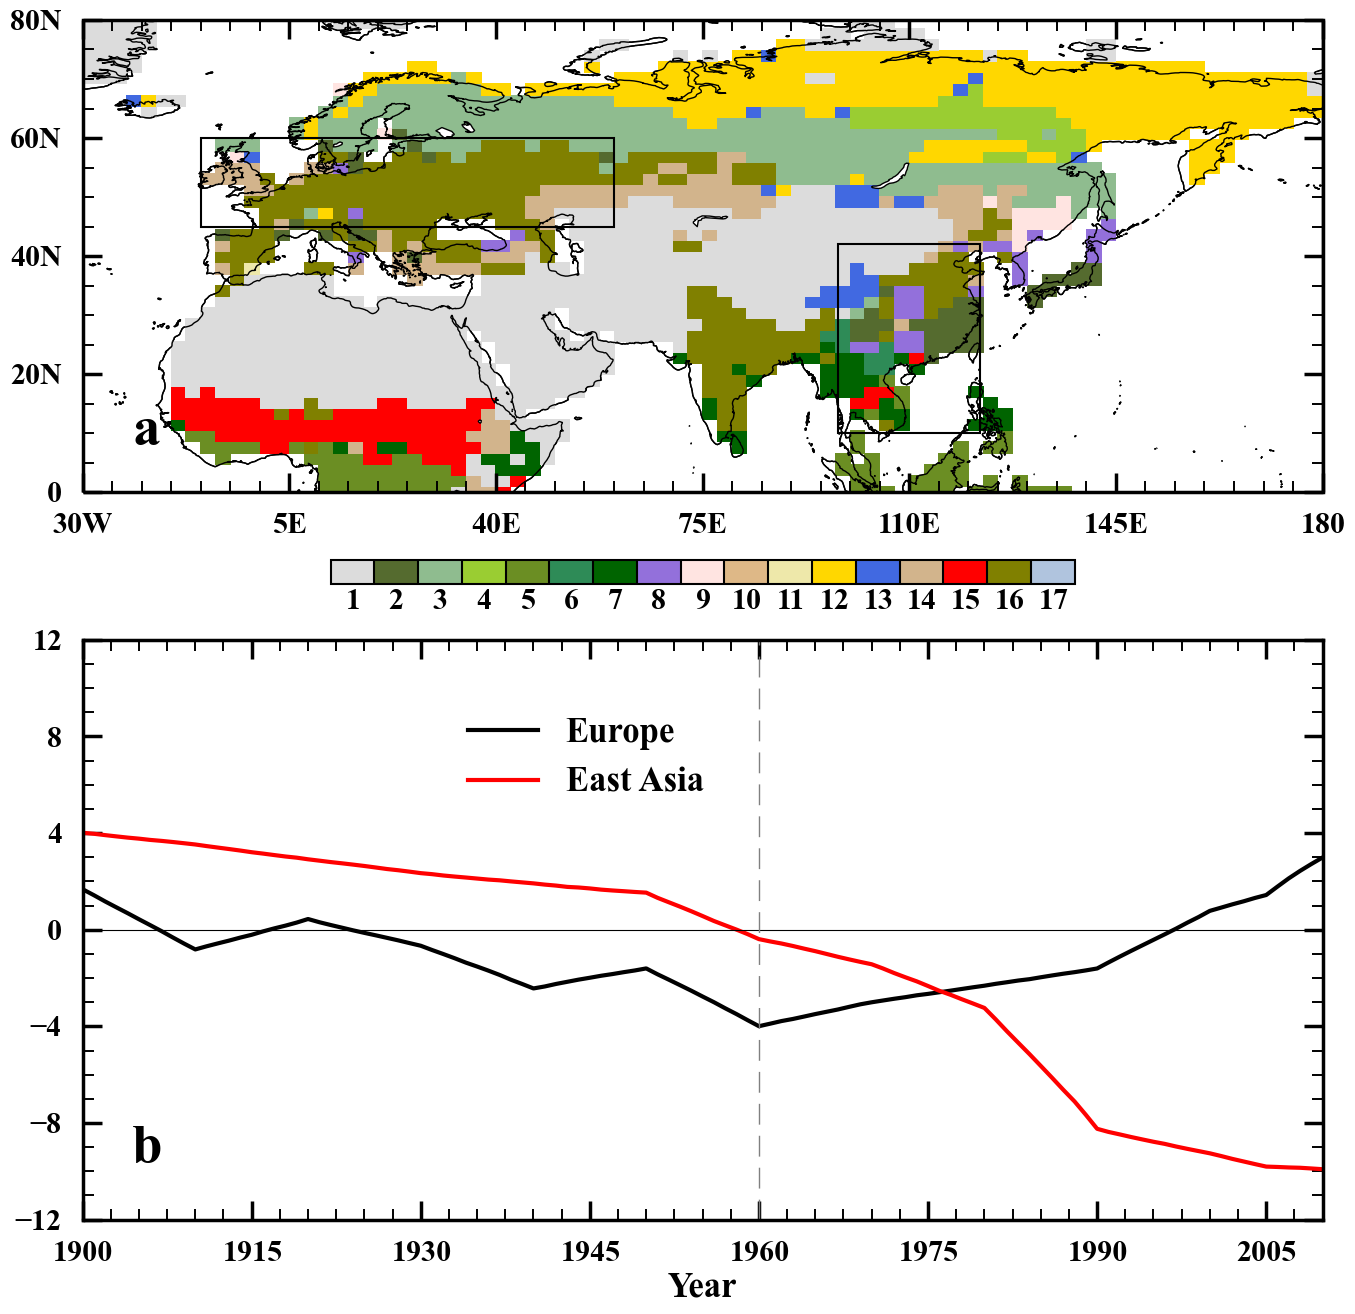

In [33]:
lonmin, lonmax = -30., 180.
latmin, latmax = 0., 80.
lon, lat = ds['LONGXY'][0], ds['LATIXY'][:, 0]
cycle_pft, cycle_lon = add_cyclic_point(pft_1960_argmax+1, coord=lon)
cycle_lon, cycle_lat = np.meshgrid(cycle_lon, lat)
fig = plt.figure(figsize=(16, 16))
gs = gridspec.GridSpec(39, 1)
gs.update(wspace=0.26, hspace=-0.4)
ax = fig.add_subplot(gs[0:21, 0], projection=ccrs.PlateCarree(central_longitude=80))
ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
# cmapzj = plt.get_cmap('RdBu_r')
# cmapzj = cmaps.NCV_blu_red
# cax = fig.add_axes([0.34 , 0.54 , 0.015, 0.12]) # 调整颜色条的位置和大小
levelzj = np.arange(0.5, 17.6, 1)
normzj = mpl.colors.BoundaryNorm(levelzj, cmapzj.N)
c1 = ax.pcolor(cycle_lon, cycle_lat, cycle_pft, transform=ccrs.PlateCarree(), cmap=cmapzj, norm=normzj)
cbar = fig.colorbar(c1, orientation='horizontal', shrink=0.6, pad=0.1, aspect=30, drawedges=True)
tick_locs = np.arange(1, 18, 1)
cbar.set_ticks(tick_locs)
# tick_labels = ['','','','','','','','','','','','','','','','','','']
# cbar.set_ticklabels(tick_labels)
cbar.ax.tick_params(color='black', width=1.5, direction='out', length=0, labelsize='large')
cbar.dividers.set_linewidth(1.5)
cbar.outline.set_linewidth(1.5)
ax.add_feature(cfeat.COASTLINE.with_scale('50m'), linewidth=1)
ax.add_feature(cfeat.LAKES.with_scale('110m'),edgecolor='k',facecolor='white',linewidth=1)
ax.add_feature(cfeat.OCEAN.with_scale('50m'), lw=1, facecolor='white', edgecolor='black')
ax.set_xticks([-30, 5, 40, 75, 110, 145, 180], crs=ccrs.PlateCarree())
ax.set_yticks([0, 20, 40, 60, 80], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(number_format='.0f',degree_symbol='', zero_direction_label=False)
lat_formatter = LatitudeFormatter(number_format='.0f',degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.tick_params(axis="both", which='major', width=2.5, length=14, direction='in', right=True, top=True, pad=15)
ax.tick_params(axis="both", which='minor', width=1.4, length=8, direction='in', right=True, top=True)
ax.tick_params(tick2On=True, label2On=False)
ax.tick_params(axis='both', labelsize='large')
ax.spines['geo'].set_linewidth(2.5)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
lonL_EU, lonR_EU = -10, 60.
latS_EU, latN_EU = 45, 60.
lonL_EA, lonR_EA = 98, 122.
latS_EA, latN_EA = 10, 42.
rect1 = mpl.patches.Rectangle((lonL_EU, latS_EU), lonR_EU-lonL_EU, latN_EU-latS_EU, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1.5, zorder = 5,transform=ccrs.PlateCarree())
rect2 = mpl.patches.Rectangle((lonL_EA, latS_EA), lonR_EA-lonL_EA, latN_EA-latS_EA, linestyle = '-', fill=False, edgecolor = 'black', linewidth = 1.5, zorder = 5,transform=ccrs.PlateCarree())
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.text(0.04, 0.1, f'a', fontsize=40, transform=ax.transAxes)



yr = np.arange(1900, 2011, 1)
xmin, xmax = 1900., 2010.
ymin, ymax = -12., 12.
ax2 = fig.add_subplot(gs[21:, 0])
ax2.plot(yr, pft_forest_eu_sum[30:], label='Europe', color='black', linewidth=3)
ax2.plot(yr, pft_forest_ea_sum[30:], label='East Asia', color='red', linewidth=3)
ax2.axhline(0, linewidth=0.8, color='black')
ax2.axvline(1960, linewidth=1, color='grey', linestyle=(0,(15,8)))
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xticks(np.arange(1900, 2011, 15))
ax2.set_yticks(np.arange(-12, 13, 4))
ax2.set_xlabel('Year', fontsize=25, weight='bold')
ax2.legend(loc=(0.3, 0.7), frameon=False, fontsize=25)
ax2.tick_params(axis="both", which='major', width=2.5, length=14, direction='in', right=True, top=True, pad=15)
ax2.tick_params(axis="both", which='minor', width=1.4, length=8, direction='in', right=True, top=True)
ax2.tick_params(tick2On=True, label2On=False)
ax2.spines['top'].set_linewidth(2.5)
ax2.spines['right'].set_linewidth(2.5)
ax2.spines['bottom'].set_linewidth(2.5)
ax2.spines['left'].set_linewidth(2.5)
ax2.xaxis.set_minor_locator(MultipleLocator(2.5))
ax2.yaxis.set_minor_locator(MultipleLocator(1))
ax2.tick_params(axis='both', labelsize='large')
plt.text(0.04, 0.1, f'b', fontsize=40, transform=ax2.transAxes)
# plt.savefig(f'F:\\hwchen\\pft_practice\\picture\\fig1-pft-v2.png', bbox_inches='tight')

In [5]:
ds = xr.open_dataset('D:\graduate\LUCC_exp\practice\surfdata.pftdyn_1.9x2.5_rcp4.5_simyr1850-2100_c110125.nc')
ds

<xarray.Dataset>
Dimensions:                 (lsmlat: 96, lsmlon: 144, time: 251, lsmpft: 17)
Coordinates:
  * time                    (time) int32 1850 1851 1852 1853 ... 2098 2099 2100
Dimensions without coordinates: lsmlat, lsmlon, lsmpft
Data variables: (12/27)
    EDGEN                   float64 ...
    EDGEE                   float64 ...
    EDGES                   float64 ...
    EDGEW                   float64 ...
    LATN                    (lsmlat, lsmlon) float64 ...
    LONE                    (lsmlat, lsmlon) float64 ...
    ...                      ...
    HARVEST_SH1             (time, lsmlat, lsmlon) float64 ...
    HARVEST_SH2             (time, lsmlat, lsmlon) float64 ...
    HARVEST_SH3             (time, lsmlat, lsmlon) float64 ...
    GRAZING                 (time, lsmlat, lsmlon) float64 ...
    YEAR                    (time) int32 ...
    input_pftdata_filename  (time) |S128 ...
Attributes: (12/21)
    Conventions:                        NCAR-CSM
    History_Log:                        created on: 01-25-11 20:18:34
    Logname:                            erik
    Host:                               be1005en.ucar.edu
    Source:                             Community Land Model: CLM3
    OMP_NUM_THREADS:                    1
    ...                                 ...
    Glacier_raw_data_file_name:         mksrf_glacier.nc
    Topography_raw_data_file_name:      mksrf_topo.10min.c080912.nc
    Fracdata_raw_data_file_name:        fracdata_10min_USGS_071205.nc
    Fmax_raw_data_file_name:            mksrf_fmax.070406.nc
    Urban_raw_data_file_name:           mksrf_urban_3den_0.5x0.5_simyr2000.c0...
    Irrig_raw_data_file_name: